In [2]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [3]:
# Cell 2: Load and explore data
df1 = pd.read_csv("../ProGamesBP/picks_bans_2016.csv")
df2=pd.read_csv("../ProGamesBP/picks_bans_2017.csv")
df3=pd.read_csv("../ProGamesBP/picks_bans_2018.csv")
df4=pd.read_csv("../ProGamesBP/picks_bans_2019.csv")
df5=pd.read_csv("../ProGamesBP/picks_bans_2020.csv")
df6=pd.read_csv("../ProGamesBP/picks_bans_2021.csv")
df7=pd.read_csv("../ProGamesBP/picks_bans_2022.csv")
df8=pd.read_csv("../ProGamesBP/picks_bans_2023.csv")
df9=pd.read_csv("../ProGamesBP/picks_bans_2024.csv")
df10=pd.read_csv("../ProGamesBP/picks_bans_2025Jan.csv")
df11=pd.read_csv("../ProGamesBP/picks_bans_2025Feb.csv")
df12=pd.read_csv("../ProGamesBP/picks_bans_2025Mar.csv")
df13=pd.read_csv("../ProGamesBP/picks_bans_2025Apr.csv")
combined_df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13], ignore_index=True)
df14=pd.read_csv("../ProGamesBP/dota2_hero_stats.csv")



# Display the first few rows
print("Pro games shape:", combined_df.head())
print("Hero Attributes：", df14.head())
combined_df.head()
df14.head()

Pro games shape:    Unnamed: 0  is_pick  hero_id  team  order  ord    match_id  leagueid
0         0.0    False     80.0   0.0    0.0  0.0  2049344492      4194
1         1.0    False     55.0   1.0    1.0  1.0  2049344492      4194
2         2.0    False     91.0   0.0    2.0  2.0  2049344492      4194
3         3.0    False     74.0   1.0    3.0  3.0  2049344492      4194
4         4.0     True      3.0   0.0    4.0  4.0  2049344492      4194
Hero Attributes：    id                          name  localized_name primary_attr attack_type  \
0   1        npc_dota_hero_antimage       Anti-Mage          agi       Melee   
1   2             npc_dota_hero_axe             Axe          str       Melee   
2   3            npc_dota_hero_bane            Bane          all      Ranged   
3   4     npc_dota_hero_bloodseeker     Bloodseeker          agi       Melee   
4   5  npc_dota_hero_crystal_maiden  Crystal Maiden          int      Ranged   

                              roles  \
0             

,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,...,turbo_picks_trend,turbo_wins,turbo_wins_trend,pro_pick,pro_win,pro_ban,pub_pick,pub_pick_trend,pub_win,pub_win_trend
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"Carry,Escape,Nuker",/apps/dota2/images/dota_react/heroes/antimage....,/apps/dota2/images/dota_react/heroes/icons/ant...,120,1.00,...,"[22243, 23002, 23423, 25984, 25659, 21078, 8831]",77834,"[11484, 11862, 12137, 13557, 13380, 10912, 4502]",142,68,407,419978,"[61145, 61845, 64238, 71536, 73240, 60786, 27188]",213066,"[31027, 31129, 32633, 36218, 37163, 31040, 13856]"
1,2,npc_dota_hero_axe,Axe,str,Melee,"Initiator,Durable,Disabler,Carry",/apps/dota2/images/dota_react/heroes/axe.png?,/apps/dota2/images/dota_react/heroes/icons/axe...,120,2.50,...,"[23316, 23820, 25139, 28651, 28931, 23634, 10089]",84710,"[12066, 12278, 13102, 14916, 14865, 12362, 5121]",309,141,326,494599,"[71869, 72539, 74682, 84939, 87202, 71505, 31863]",254311,"[36661, 36852, 38611, 43806, 45129, 36912, 16340]"
2,3,npc_dota_hero_bane,Bane,all,Ranged,"Support,Disabler,Nuker,Durable",/apps/dota2/images/dota_react/heroes/bane.png?,/apps/dota2/images/dota_react/heroes/icons/ban...,120,0.25,...,"[4554, 4764, 4961, 5442, 5409, 4447, 1867]",14685,"[2111, 2232, 2310, 2560, 2541, 2052, 879]",109,50,47,66947,"[9939, 9595, 10096, 11691, 11767, 9676, 4183]",32969,"[4795, 4717, 4976, 5775, 5750, 4905, 2051]"
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"Carry,Disabler,Nuker,Initiator",/apps/dota2/images/dota_react/heroes/bloodseek...,/apps/dota2/images/dota_react/heroes/icons/blo...,120,0.25,...,"[9532, 9498, 9878, 11100, 11204, 9098, 3736]",31561,"[4672, 4702, 4892, 5386, 5492, 4546, 1871]",75,30,88,126469,"[17867, 18516, 18942, 21692, 22528, 18453, 8471]",65011,"[9159, 9459, 9810, 11311, 11484, 9500, 4288]"
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"Support,Disabler,Nuker",/apps/dota2/images/dota_react/heroes/crystal_m...,/apps/dota2/images/dota_react/heroes/icons/cry...,120,0.25,...,"[20317, 20262, 21663, 25012, 25396, 20652, 8324]",71135,"[10122, 10211, 10917, 12447, 12786, 10427, 4225]",241,117,38,336251,"[47304, 48117, 50968, 58690, 60085, 49096, 21991]",167445,"[23459, 23928, 25345, 29155, 30063, 24500, 10995]"


In [27]:
# First, filter the combined_df to keep only picks， removes the bans pick
picks_only_df = combined_df[combined_df['is_pick'] == True]

# Now merge the filtered dataframe with hero stats
hero_id_col_stats = 'id' if 'id' in df14.columns else 'id'
hero_id_col_picks = 'hero_id'

merged_df = pd.merge(
    picks_only_df,
    df14,
    left_on=hero_id_col_picks,
    right_on=hero_id_col_stats,
    how='left'  # Keep all pick records, even if hero stats are missing
)

# Check if any picks didn't match with hero stats
missing_matches = merged_df[merged_df[hero_id_col_stats].isna()].shape[0]
print(f"Records without matching hero stats: {missing_matches}")

# Save the combined dataset
merged_df.to_csv('dota2_complete_dataset.csv', index=False)
print(f"Successfully merged data into 'dota2_final_dataset.csv'")
print(f"Combined dataset has {merged_df.shape[0]} rows and {merged_df.shape[1]} columns")

Records without matching hero stats: 0
Successfully merged data into 'dota2_complete_dataset.csv'
Combined dataset has 1683171 rows and 68 columns


In [4]:
pd.set_option('display.max_columns', None)
fulldataset=pd.read_csv("../model/dota2_complete_dataset.csv")
fulldataset.tail()

,Unnamed: 0,is_pick,hero_id,team,order,ord,match_id,leagueid,id,name,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,1_pick,1_win,2_pick,2_win,3_pick,3_win,4_pick,4_win,5_pick,5_win,6_pick,6_win,7_pick,7_win,8_pick,8_win,turbo_picks,turbo_picks_trend,turbo_wins,turbo_wins_trend,pro_pick,pro_win,pro_ban,pub_pick,pub_pick_trend,pub_win,pub_win_trend
1683166,NaN,True,131.0,1.0,15.0,NaN,8237391929,17211,131,npc_dota_hero_ringmaster,Ringmaster,int,Ranged,"Support,Nuker,Escape,Disabler",/apps/dota2/images/dota_react/heroes/ringmaste...,/apps/dota2/images/dota_react/heroes/icons/rin...,120,0.25,75,0.0,1,25,23,33,21,13,25,2.1,1.4,3.0,575,1200,1.7,100,0.50,310,0.6,True,2,1800,800,3628,1644,10911,5158,18092,8537,22155,10418,21493,10107,16974,8091,12798,6268,8386,4137,41132,"[5650, 5725, 6344, 7292, 7546, 6053, 2522]",18740,"[2551, 2608, 2865, 3297, 3538, 2731, 1150]",237,132,107,120173,"[15292, 15621, 18260, 21032, 22349, 19084, 8535]",57073,"[7315, 7423, 8617, 9978, 10627, 8994, 4119]"
1683167,NaN,True,98.0,1.0,16.0,NaN,8237391929,17211,98,npc_dota_hero_shredder,Timbersaw,str,Melee,"Nuker,Durable,Escape",/apps/dota2/images/dota_react/heroes/shredder....,/apps/dota2/images/dota_react/heroes/icons/shr...,120,0.25,75,0.5,0,25,23,27,26,16,23,3.5,1.6,2.7,150,900,1.7,100,0.36,285,NaN,True,2,1800,800,8037,3774,19065,8686,24135,11133,25633,11877,21787,10190,15431,7240,10220,4849,5671,2643,50000,"[7306, 7419, 8268, 8812, 8481, 6901, 2813]",23845,"[3445, 3547, 3966, 4161, 4064, 3318, 1344]",173,76,108,143721,"[19135, 19610, 23339, 25837, 25903, 20895, 9002]",66877,"[8676, 8825, 11005, 12234, 12138, 9782, 4217]"
1683168,NaN,True,69.0,0.0,17.0,NaN,8237391929,17211,69,npc_dota_hero_doom_bringer,Doom,str,Melee,"Carry,Disabler,Initiator,Durable,Nuker",/apps/dota2/images/dota_react/heroes/doom_brin...,/apps/dota2/images/dota_react/heroes/icons/doo...,120,1.25,75,0.0,2,25,32,42,24,15,15,3.8,1.5,1.7,200,900,1.9,100,0.50,290,NaN,True,2,1800,800,4935,2299,14718,6636,20943,9336,23074,10366,20370,9378,14258,6550,9959,4612,5785,2689,34247,"[4903, 4845, 5325, 6013, 6177, 4899, 2085]",15727,"[2250, 2169, 2456, 2726, 2819, 2318, 989]",180,77,244,123437,"[17168, 17607, 19052, 21703, 21565, 17725, 8617]",56300,"[7803, 8007, 8644, 9960, 9854, 8081, 3951]"
1683169,NaN,True,19.0,0.0,22.0,NaN,8237391929,17211,19,npc_dota_hero_tiny,Tiny,str,Melee,"Carry,Nuker,Pusher,Initiator,Durable,Disabler",/apps/dota2/images/dota_react/heroes/tiny.png?,/apps/dota2/images/dota_react/heroes/icons/tin...,120,2.00,75,0.0,0,25,31,37,30,0,17,4.0,0.0,2.2,150,900,1.7,90,0.40,275,NaN,True,2,1800,800,14301,6814,39289,18435,55493,25983,64946,30571,59849,28339,44376,20887,31974,15252,20285,9742,105010,"[17193, 16163, 15965, 17513, 17683, 14453, 6040]",47554,"[8008, 7497, 7197, 7832, 7881, 6468, 2671]",658,320,808,354015,"[56963, 56897, 52486, 57802, 58566, 49078, 22223]",167359,"[27389, 27361, 24644, 26975, 27591, 22929, 10470]"
1683170,NaN,True,18.0,1.0,23.0,NaN,8237391929,17211,18,npc_dota_hero_sven,Sven,str,Melee,"Carry,Disabler,Initiator,Durable,Nuker",/apps/dota2/images/dota_react/heroes/sven.png?,/apps/dota2/images/dota_react/heroes/icons/sve...,120,0.75,75,0.0,0,25,37,39,23,18,16,3.5,2.2,1.5,150,0,1.9,110,0.40,325,NaN,True,2,1800,800,12025,6004,30764,15168,38228,18926,38558,19096,32283,15771,22158,10700,14925,7227,8784,4377,75143,"[12359, 10426, 11093, 12746, 13167, 10771, 4581]",37911,"[6262, 5201, 5667, 6523, 6619, 5339, 2300]",238,111,84,217391,"[31111, 29886, 32269, 37162, 39030, 32702, 15231]",107157,"[15084, 14604, 16089, 18540, 19254, 16011, 7575]"


In [4]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split # Make sure this is imported

def prepare_hero_recommendation_data(df):
    # List of all numeric hero stats to include
    hero_stat_columns = [
        'base_health', 'base_health_regen', 'base_mana', 'base_mana_regen',
        'base_armor', 'base_mr', 'base_attack_min', 'base_attack_max',
        'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
        'attack_range', 'attack_rate', 'base_attack_time',
        'attack_point', 'move_speed'
    ]

    # Convert stat columns to values
    for col in hero_stat_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"Missing column :{col}.")

    #Removes row if Nan Value appears, trying to debug the NaN issue
    df['hero_id'] = pd.to_numeric(df['hero_id'], errors='coerce')
    df.dropna(subset=['hero_id'], inplace=True)
    df['hero_id'] = df['hero_id'].astype(int)



    # Creating a dictionary when processing data, so it is easier to access data in the future
    hero_info = {}
    unique_heroes_df = df.drop_duplicates('hero_id').set_index('hero_id')

    for hero_id, row in unique_heroes_df.iterrows():
        hero_data = {
            'primary_attr': row.get('primary_attr', ''),
            'roles': row.get('roles', '')
        }
        # Add all numeric stats, filling NaNs with 0.0
        for stat in hero_stat_columns:
            if stat in row:
                stat_value = row[stat]
                # Fill NaN with 0.0
                hero_data[stat] = 0.0 if pd.isna(stat_value) else float(stat_value)
            else:
                 hero_data[stat] = 0.0 # Default if column doesn't exist

        hero_info[hero_id] = hero_data


    # Create attribute mapping
    attr_to_idx = {'str': 0, 'agi': 1, 'int': 2, 'all': 3} # Assuming 'all' exists or handle default

    # Extract roles
    all_roles = set()
    for hero_data in hero_info.values():
        roles = hero_data.get('roles', '')
        if isinstance(roles, str):
            for role in roles.split(','):
                clean_role = role.strip()
                if clean_role:
                    all_roles.add(clean_role)
    role_to_idx = {role: idx for idx, role in enumerate(sorted(all_roles))}
    num_roles = len(role_to_idx)
    print(f"Found {num_roles} unique roles")
    print(f"Collected stats for {len(hero_info)} heroes")

    features_heroes = []
    features_attrs = []
    features_roles = []
    features_stats = []
    targets_next_heroes = []

    # Process matches
    print(f"Processing {df['match_id'].nunique()} matches...")
    match_groups = df.groupby('match_id')

    skipped_matches_count = 0
    processed_matches_count = 0

    for match_id, match_data in match_groups:
        #appends the different team picks into 2 list
        radiant_picks = match_data[match_data['team'] == 0]['hero_id'].tolist()
        dire_picks = match_data[match_data['team'] == 1]['hero_id'].tolist()

        # Skip matches with insufficient picks OR invalid hero IDs
        if len(radiant_picks) < 4 or len(dire_picks) < 2:
            skipped_matches_count += 1
            continue

        input_heroes = radiant_picks[:2] + dire_picks[:2]
        target_hero = radiant_picks[2] # Target is the 3rd Radiant hero

        #Validate all heroes involved in this potential example
        involved_heroes = input_heroes + [target_hero]
        valid_match = True
        for hero_id in involved_heroes:
             # Check if hero_id is integer and exists in our processed hero_info
            if not isinstance(hero_id, (int, np.integer)) or hero_id not in hero_info:
                 valid_match = False
                 break
        if not valid_match:
            skipped_matches_count += 1
            continue
        #End Validation


        # I extract features
        input_attrs = []
        input_roles = []
        input_stats_flat = []

        for hero_id in input_heroes:
            # Already validated that hero_id is in hero_info
            primary_attr = attr_to_idx.get(hero_info[hero_id]['primary_attr'], 0) # Default unknown attr

            roles_str = str(hero_info[hero_id].get('roles', ''))
            roles_list = roles_str.split(',') if roles_str else []
            primary_role_str = roles_list[0].strip() if roles_list else ''
            primary_role = role_to_idx.get(primary_role_str, num_roles) # Use num_roles as default index for unknown

            hero_stats_list = []
            for stat in hero_stat_columns:
                stat_value = hero_info[hero_id].get(stat, 0.0)
                hero_stats_list.append(float(stat_value))

            input_attrs.append(primary_attr)
            input_roles.append(primary_role)
            input_stats_flat.extend(hero_stats_list)


        # Final check on stats length before adding
        expected_stat_len = len(hero_stat_columns) * 4
        if len(input_stats_flat) != expected_stat_len:
             print(f"Warning: Final stat length mismatch for match {match_id}. Expected {expected_stat_len}, got {len(input_stats_flat)}. Skipping.")
             skipped_matches_count += 1
             continue


        # Add to datasets
        features_heroes.append(input_heroes)
        features_attrs.append(input_attrs)
        features_roles.append(input_roles)
        features_stats.append(input_stats_flat)
        targets_next_heroes.append(target_hero)
        processed_matches_count += 1


    print(f"Processed {processed_matches_count} examples.")
    print(f"Skipped {skipped_matches_count} matches due to insufficient picks or invalid data.")

    if not features_heroes:
         raise ValueError("No valid examples could be created. Check data quality and filtering logic.")

    # Convert to numpy arrays
    X_heroes = np.array(features_heroes)
    X_attrs = np.array(features_attrs)
    X_roles = np.array(features_roles)
    X_stats = np.array(features_stats, dtype=np.float32)
    y_heroes = np.array(targets_next_heroes)

    (X_train_heroes, X_test_heroes,
     X_train_attrs, X_test_attrs,
     X_train_roles, X_test_roles,
     X_train_stats, X_test_stats,
     y_train_heroes, y_test_heroes) = train_test_split(
        X_heroes, X_attrs, X_roles, X_stats, y_heroes,
        test_size=0.2,
        random_state=42
     )

    # Convert to tensors
    X_train_heroes_tensor = torch.tensor(X_train_heroes, dtype=torch.long)
    X_test_heroes_tensor = torch.tensor(X_test_heroes, dtype=torch.long)

    X_train_attrs_tensor = torch.tensor(X_train_attrs, dtype=torch.long)
    X_test_attrs_tensor = torch.tensor(X_test_attrs, dtype=torch.long)

    X_train_roles_tensor = torch.tensor(X_train_roles, dtype=torch.long)
    X_test_roles_tensor = torch.tensor(X_test_roles, dtype=torch.long)


    X_train_stats_tensor = torch.from_numpy(X_train_stats)
    X_test_stats_tensor = torch.from_numpy(X_test_stats)

    y_train_heroes_tensor = torch.tensor(y_train_heroes, dtype=torch.long)
    y_test_heroes_tensor = torch.tensor(y_test_heroes, dtype=torch.long)


    if torch.isnan(X_train_stats_tensor).any():
        print("ERROR: NaNs found in X_train_stats_tensor!")
    if torch.isinf(X_train_stats_tensor).any():
        print("ERROR: Infs found in X_train_stats_tensor!")
    if torch.isnan(X_test_stats_tensor).any():
        print("ERROR: NaNs found in X_test_stats_tensor!")
    if torch.isinf(X_test_stats_tensor).any():
        print("ERROR: Infs found in X_test_stats_tensor!")



    # Create datasets
    train_dataset = TensorDataset(
        X_train_heroes_tensor, X_train_attrs_tensor, X_train_roles_tensor,
        X_train_stats_tensor, y_train_heroes_tensor
    )

    test_dataset = TensorDataset(
        X_test_heroes_tensor, X_test_attrs_tensor, X_test_roles_tensor,
        X_test_stats_tensor, y_test_heroes_tensor
    )

    # Create dataloaders
    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    print(f"Training set: {len(train_dataset)}, Test set: {len(test_dataset)}")

    # Determine num_heroes based on the MAX ID actually present + 1 (or use hero_info keys)
    # max_hero_id_present = max(hero_info.keys()) if hero_info else 0
    # num_heroes = max_hero_id_present + 1
    # Safer: Use max ID from the original DataFrame after cleaning
    max_hero_id_in_data = int(df['hero_id'].max())
    num_heroes = max_hero_id_in_data + 1 # Make sure index 0 is handled if used (e.g., padding)
    print(f"Determined num_heroes for embedding: {num_heroes} (based on max hero_id {max_hero_id_in_data})")

    # Define default index for unknown roles
    unknown_role_idx = num_roles # Assign the next available index
    role_to_idx['<UNK_ROLE>'] = unknown_role_idx
    num_roles += 1


    # Return necessary information
    return train_loader, test_loader, {
        'num_heroes': num_heroes,
        'num_attributes': len(attr_to_idx),
        'num_roles': num_roles, # Updated count including UNK
        'attr_mapping': attr_to_idx,
        'role_mapping': role_to_idx, # Updated mapping
        'hero_info': hero_info,
        'stat_columns': hero_stat_columns,
        'stat_dim': len(hero_stat_columns) * 4, # Total dimension of flattened hero stats (4 heroes)
    }

Found 8 unique roles


KeyboardInterrupt: 

In [6]:
# Define the hero recommendation model with hero stats
class HeroRecommender(nn.Module):
    def __init__(self, num_heroes, num_roles, num_attributes, stat_dim=0,
                 hero_embedding_dim=128, role_embedding_dim=32, attr_embedding_dim=16):
        super(HeroRecommender, self).__init__()

        # Hero embeddings
        self.hero_embeddings = nn.Embedding(num_heroes, hero_embedding_dim, padding_idx=0)

        # Role embeddings
        self.role_embeddings = nn.Embedding(num_roles, role_embedding_dim)

        # Attribute embeddings
        self.attr_embeddings = nn.Embedding(num_attributes, attr_embedding_dim)


        # Stats processor
        self.use_stats = stat_dim > 0

        #Stat_dim=78, therefore 128 is sufficient
        if self.use_stats:
            self.stats_processor = nn.Sequential(
                nn.Linear(stat_dim, 128),
                nn.BatchNorm1d(128),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(128, 256),
                nn.BatchNorm1d(256),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(256, 512),
                nn.BatchNorm1d(512),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(512, 256),
                nn.BatchNorm1d(256),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(256, 128),
                nn.BatchNorm1d(128),
                nn.LeakyReLU(),
                nn.Dropout(0.4),
            )
            stats_output_dim = 128
        else:
            stats_output_dim = 0


        # Total embedding dimension per hero
        single_hero_dim = hero_embedding_dim + role_embedding_dim + attr_embedding_dim

        # Total input dimension (4 heroes + processed stats if available)
        total_input_dim = (single_hero_dim * 4) + stats_output_dim
        print

        # Hidden dimensions
        hidden1 = total_input_dim*2
        hidden2 = total_input_dim*4
        hidden3 = total_input_dim*8
        hidden4 = total_input_dim*16
        hidden5 = total_input_dim*32

        # Encoder network
        self.encoder = nn.Sequential(
            nn.Linear(total_input_dim,hidden1),
            nn.BatchNorm1d(hidden1),
            nn.LeakyReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden1, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.LeakyReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden2, hidden3),
            nn.BatchNorm1d(hidden3),
            nn.LeakyReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden3, hidden4),
            nn.BatchNorm1d(hidden4),
            nn.LeakyReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden4, hidden3),
            nn.BatchNorm1d(hidden3),
            nn.LeakyReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden3, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.LeakyReLU(),
            nn.Dropout(0.5),

            nn.Linear(hidden2, hidden1),
            nn.BatchNorm1d(hidden1),
            nn.LeakyReLU(),
            nn.Dropout(0.5),
        )

        # Output layer
        self.hero_decoder = nn.Linear(hidden1, num_heroes)

    def forward(self, hero_ids, attr_ids, role_ids, hero_stats=None):
        # Process each hero
        hero_embeds = []

        for i in range(4):  # Process 4 heroes
            # Get hero embedding
            hero_embed = self.hero_embeddings(hero_ids[:, i])


            # Get attribute embedding
            attr_embed = self.attr_embeddings(attr_ids[:, i])


            # Get role embedding
            role_embed = self.role_embeddings(role_ids[:, i])


            # Combine embeddings for this hero
            hero_combined = torch.cat([hero_embed, attr_embed, role_embed], dim=1)
            hero_embeds.append(hero_combined)

        # Process hero stats if given, and not NaN values
        if self.use_stats and hero_stats is not None:
            processed_stats = self.stats_processor(hero_stats)
            # Combine all hero embeddings and processed stats
            combined_input = torch.cat(hero_embeds + [processed_stats], dim=1)

        else:
            # When stats are enabled but not provided, create zeros tensor
            if self.use_stats:
                batch_size = hero_ids.shape[0]
                dummy_stats = torch.zeros(batch_size, 128, device=hero_ids.device)
                combined_input = torch.cat(hero_embeds + [dummy_stats], dim=1)
            else:
                combined_input = torch.cat(hero_embeds, dim=1)

        # Encode draft state
        encoded = self.encoder(combined_input)

        # Predict next hero
        hero_scores = self.hero_decoder(encoded)

        # Mask out already picked heroes
        hero_mask = torch.zeros_like(hero_scores, dtype=torch.bool)
        for i in range(hero_scores.size(0)):
            for j in range(4):
                hero_id = hero_ids[i, j].item()
                if hero_id > 0:  # Skip padding
                    hero_mask[i, hero_id] = True

            # Also mask padding index
            hero_mask[i, 0] = True

        hero_scores = hero_scores.masked_fill(hero_mask, -100)


        return hero_scores


model = HeroRecommender(
    num_heroes=feature_maps['num_heroes'],
    num_roles=feature_maps['num_roles'],
    num_attributes=feature_maps['num_attributes'],
    stat_dim=stat_dim
).to(device)

print(model)
print( )

DotaDraftAssistant(
  (hero_embeddings): Embedding(146, 128, padding_idx=0)
  (role_embeddings): Embedding(8, 32)
  (attr_embeddings): Embedding(4, 16)
  (encoder): Sequential(
    (0): Linear(in_features=704, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): LeakyReLU(negative_slope=0.01)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=512, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=512, out_features=512, bias=True)
    (13): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, 

In [8]:
# Define the hero recommendation model with hero stats
class HeroRecommender(nn.Module):
    def __init__(self, num_heroes, num_roles, num_attributes, stat_dim=0,
                 hero_embedding_dim=128, role_embedding_dim=32, attr_embedding_dim=16):
        super(HeroRecommender, self).__init__()

        # Hero embeddings
        self.hero_embeddings = nn.Embedding(num_heroes, hero_embedding_dim, padding_idx=0)

        # Role embeddings
        self.role_embeddings = nn.Embedding(num_roles, role_embedding_dim)

        # Attribute embeddings
        self.attr_embeddings = nn.Embedding(num_attributes, attr_embedding_dim)


        # Stats processor (if stats are provided)
        self.use_stats = stat_dim > 0

        #Stat_dim=78, therefore 128 is sufficient
        if self.use_stats:
            self.stats_processor = nn.Sequential(
                nn.Linear(stat_dim, 128),
                nn.BatchNorm1d(128),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(128, 256),
                nn.BatchNorm1d(256),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(256, 512),
                nn.BatchNorm1d(512),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(512, 256),
                nn.BatchNorm1d(256),
                nn.LeakyReLU(),
                nn.Dropout(0.4),

                nn.Linear(256, 128),
                nn.BatchNorm1d(128),
                nn.LeakyReLU(),
                nn.Dropout(0.4),
            )
            stats_output_dim = 128
        else:
            stats_output_dim = 0


        # Total embedding dimension per hero
        single_hero_dim = hero_embedding_dim + role_embedding_dim + attr_embedding_dim

        # Total input dimension (4 heroes + processed stats if available)
        total_input_dim = (single_hero_dim * 4) + stats_output_dim
        print

        # Hidden dimensions
        hidden1 = total_input_dim*2
        hidden2 = total_input_dim*4
        hidden3 = total_input_dim*8
        hidden4 = total_input_dim*16
        hidden5 = total_input_dim*32

        # Encoder network
        self.encoder = nn.Sequential(
            nn.Linear(total_input_dim,hidden1),
            nn.BatchNorm1d(hidden1),
            nn.LeakyReLU(),
            nn.Dropout(0.55),

            nn.Linear(hidden1, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.LeakyReLU(),
            nn.Dropout(0.55),

            nn.Linear(hidden2, hidden3),
            nn.BatchNorm1d(hidden3),
            nn.LeakyReLU(),
            nn.Dropout(0.55),

            nn.Linear(hidden3, hidden4),
            nn.BatchNorm1d(hidden4),
            nn.LeakyReLU(),
            nn.Dropout(0.55),

            nn.Linear(hidden4, hidden3),
            nn.BatchNorm1d(hidden3),
            nn.LeakyReLU(),
            nn.Dropout(0.55),

            nn.Linear(hidden3, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.LeakyReLU(),
            nn.Dropout(0.55),

            nn.Linear(hidden2, hidden1),
            nn.BatchNorm1d(hidden1),
            nn.LeakyReLU(),
            nn.Dropout(0.55),
        )

        # Output layer
        self.hero_decoder = nn.Linear(hidden1, num_heroes)

    def forward(self, hero_ids, attr_ids, role_ids, hero_stats=None):
        # Process each hero
        hero_embeds = []

        for i in range(4):  # Process 4 heroes
            # Get hero embedding
            hero_embed = self.hero_embeddings(hero_ids[:, i])


            # Get attribute embedding
            attr_embed = self.attr_embeddings(attr_ids[:, i])


            # Get role embedding
            role_embed = self.role_embeddings(role_ids[:, i])


            # Combine embeddings for this hero
            hero_combined = torch.cat([hero_embed, attr_embed, role_embed], dim=1)
            hero_embeds.append(hero_combined)

        # Process hero stats if given, and not NaN values
        if self.use_stats and hero_stats is not None:
            processed_stats = self.stats_processor(hero_stats)
            # Combine all hero embeddings and processed stats
            combined_input = torch.cat(hero_embeds + [processed_stats], dim=1)

        else:
            # When stats are enabled but not provided, create zeros tensor
            if self.use_stats:
                batch_size = hero_ids.shape[0]
                dummy_stats = torch.zeros(batch_size, 128, device=hero_ids.device)
                combined_input = torch.cat(hero_embeds + [dummy_stats], dim=1)
            else:
                combined_input = torch.cat(hero_embeds, dim=1)

        # Encode draft state
        encoded = self.encoder(combined_input)

        # Predict next hero
        hero_scores = self.hero_decoder(encoded)

        # Mask out already picked heroes
        hero_mask = torch.zeros_like(hero_scores, dtype=torch.bool)
        for i in range(hero_scores.size(0)):
            for j in range(4):
                hero_id = hero_ids[i, j].item()
                if hero_id > 0:  # Skip padding
                    hero_mask[i, hero_id] = True

            # Also mask padding index
            hero_mask[i, 0] = True

        hero_scores = hero_scores.masked_fill(hero_mask, -100)


        return hero_scores


model = HeroRecommender(
    num_heroes=feature_maps['num_heroes'],
    num_roles=feature_maps['num_roles'],
    num_attributes=feature_maps['num_attributes'],
    stat_dim=stat_dim
).to(device)

print(model)
print( )

In [9]:
# Define the training function
def train_hero_recommender(model, train_loader, test_loader, num_epochs=20, lr=0.0001):
    # Set device
    device = next(model.parameters()).device

    # Criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)


    # Metrics storage
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    train_top10_accs = []
    test_top10_accs = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct_top1 = 0
        correct_top10 = 0
        total_samples = 0

        for batch in train_loader:
            # Unpack the batch based on its structure
            if len(batch) == 4:
                hero_ids, attr_ids, role_ids, targets = batch
                # Model doesn't use hero_stats, so we don't need to pass it
            elif len(batch) == 5:
                hero_ids, attr_ids, role_ids, hero_stats, targets = batch
                # We'll ignore hero_stats to match model's forward signature
            else:
                continue

            # Move to device
            hero_ids = hero_ids.to(device)
            attr_ids = attr_ids.to(device)
            role_ids = role_ids.to(device)
            targets = targets.to(device)

            if len(targets.shape) > 1:
                targets = targets.squeeze()




            # Forward pass - only using the parameters the model accept
            optimizer.zero_grad()
            if len(batch) == 4:
                # Use the tensors that were already moved to device
                hero_scores = model(hero_ids, attr_ids, role_ids)
            elif len(batch) == 5:
                # Move hero_stats to device and then use all tensors
                hero_stats = hero_stats.to(device)
                hero_scores = model(hero_ids, attr_ids, role_ids, hero_stats)
            # Calculate loss
            loss = criterion(hero_scores, targets)

            # Check for NaN loss
            #if torch.isnan(loss):
                #print(f"NaN loss detected! Skipping batch.")
                #continue

            # Backward pass
            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            total_loss += loss.item()

            # Get top-1 and top-10 predictions
            _, top1 = torch.max(hero_scores, 1)
            _, top10 = torch.topk(hero_scores, k=10, dim=1)

            # Convert tensors to numpy for easier comparison
            top10_np = top10.cpu().numpy()
            targets_np = targets.cpu().numpy()

            # Count top-1 correct predictions
            correct_top1 += (top1 == targets).sum().item()

            # Count top-10 correct predictions
            batch_size = targets.size(0)
            for i in range(batch_size):
                if targets_np[i] in top10_np[i]:
                    correct_top10 += 1

            total_samples += batch_size

        # Test phase
        model.eval()
        test_loss = 0
        test_correct_top1 = 0
        test_correct_top10 = 0
        test_total_samples = 0

        with torch.no_grad():
            for batch in test_loader:
                # Unpack the batch based on its structure
                if len(batch) == 4:
                    hero_ids, attr_ids, role_ids, targets = batch
                    # Model doesn't use hero_stats, so we don't need to pass it
                elif len(batch) == 5:
                    hero_ids, attr_ids, role_ids, hero_stats, targets = batch
                    # We'll ignore hero_stats to match model's forward signature
                else:
                    continue

                # Move to device
                hero_ids = hero_ids.to(device)
                attr_ids = attr_ids.to(device)
                role_ids = role_ids.to(device)
                targets = targets.to(device)

                if len(targets.shape) > 1:
                    targets = targets.squeeze()


                # Forward pass - only using the parameters the model accepts
                hero_scores = model(hero_ids, attr_ids, role_ids)

                # Calculate loss
                loss = criterion(hero_scores, targets)

                # Skip NaN loss
                if torch.isnan(loss):
                    continue

                test_loss += loss.item()

                # Get top-1 and top-10 predictions
                _, top1 = torch.max(hero_scores, 1)
                _, top10 = torch.topk(hero_scores, k=10, dim=1)

                # Convert tensors to numpy for easier comparison
                top10_np = top10.cpu().numpy()
                targets_np = targets.cpu().numpy()

                # Count top-1 correct predictions
                test_correct_top1 += (top1 == targets).sum().item()

                # Count top-10 correct predictions
                batch_size = targets.size(0)
                for i in range(batch_size):
                    if targets_np[i] in top10_np[i]:
                        test_correct_top10 += 1

                test_total_samples += batch_size

        # Calculate metrics
        train_loss = total_loss / len(train_loader)
        train_acc_top1 = correct_top1 / total_samples if total_samples > 0 else 0
        train_acc_top10 = correct_top10 / total_samples if total_samples > 0 else 0

        test_loss = test_loss / len(test_loader)
        test_acc_top1 = test_correct_top1 / test_total_samples if test_total_samples > 0 else 0
        test_acc_top10 = test_correct_top10 / test_total_samples if test_total_samples > 0 else 0

        # Store metrics
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc_top1)
        test_accs.append(test_acc_top1)
        train_top10_accs.append(train_acc_top10)
        test_top10_accs.append(test_acc_top10)

        # Update learning rate
        scheduler.step(test_loss)


        # Print metrics
        print(f"Epoch {epoch+1}/{num_epochs}")
        print(f"Training Loss: {train_loss:.4f}, Top-1 Acc: {train_acc_top1:.4f}, Top-10 Acc: {train_acc_top10:.4f}")
        print(f"Validation Loss: {test_loss:.4f}, Top-1 Acc: {test_acc_top1:.4f}, Top-10 Acc: {test_acc_top10:.4f}")
        print("-" * 50)



    return model, train_losses, test_losses, train_accs, test_accs, train_top10_accs, test_top10_accs

Score stats: min=-100.00, max=0.04
Score mean=-3.42, std=18.19
Epoch 1/70
Training Loss: 38.9492, Top-1 Acc: 0.3677, Top-10 Acc: 0.4380
Validation Loss: 24.8971, Top-1 Acc: 0.3823, Top-10 Acc: 0.4447
--------------------------------------------------
Epoch 2/70
Training Loss: 23.2540, Top-1 Acc: 0.3715, Top-10 Acc: 0.4427
Validation Loss: 22.2971, Top-1 Acc: 0.3833, Top-10 Acc: 0.4449
--------------------------------------------------
Epoch 3/70
Training Loss: 23.0962, Top-1 Acc: 0.3699, Top-10 Acc: 0.4404
Validation Loss: 23.8060, Top-1 Acc: 0.3812, Top-10 Acc: 0.4396
--------------------------------------------------
Epoch 4/70
Training Loss: 24.3152, Top-1 Acc: 0.3695, Top-10 Acc: 0.4390
Validation Loss: 27.3212, Top-1 Acc: 0.3816, Top-10 Acc: 0.4449
--------------------------------------------------
Epoch 5/70
Training Loss: 27.3838, Top-1 Acc: 0.3705, Top-10 Acc: 0.4381
Validation Loss: 29.4007, Top-1 Acc: 0.3805, Top-10 Acc: 0.4449
------------------------------------------------

KeyboardInterrupt: 

In [ ]:
num_epochs = 50  # Adjust as needed
model, train_losses, test_losses, train_accs, test_accs, train_top10_accs, test_top10_accs = train_hero_recommender(
    model, train_loader, test_loader, num_epochs=num_epochs
)

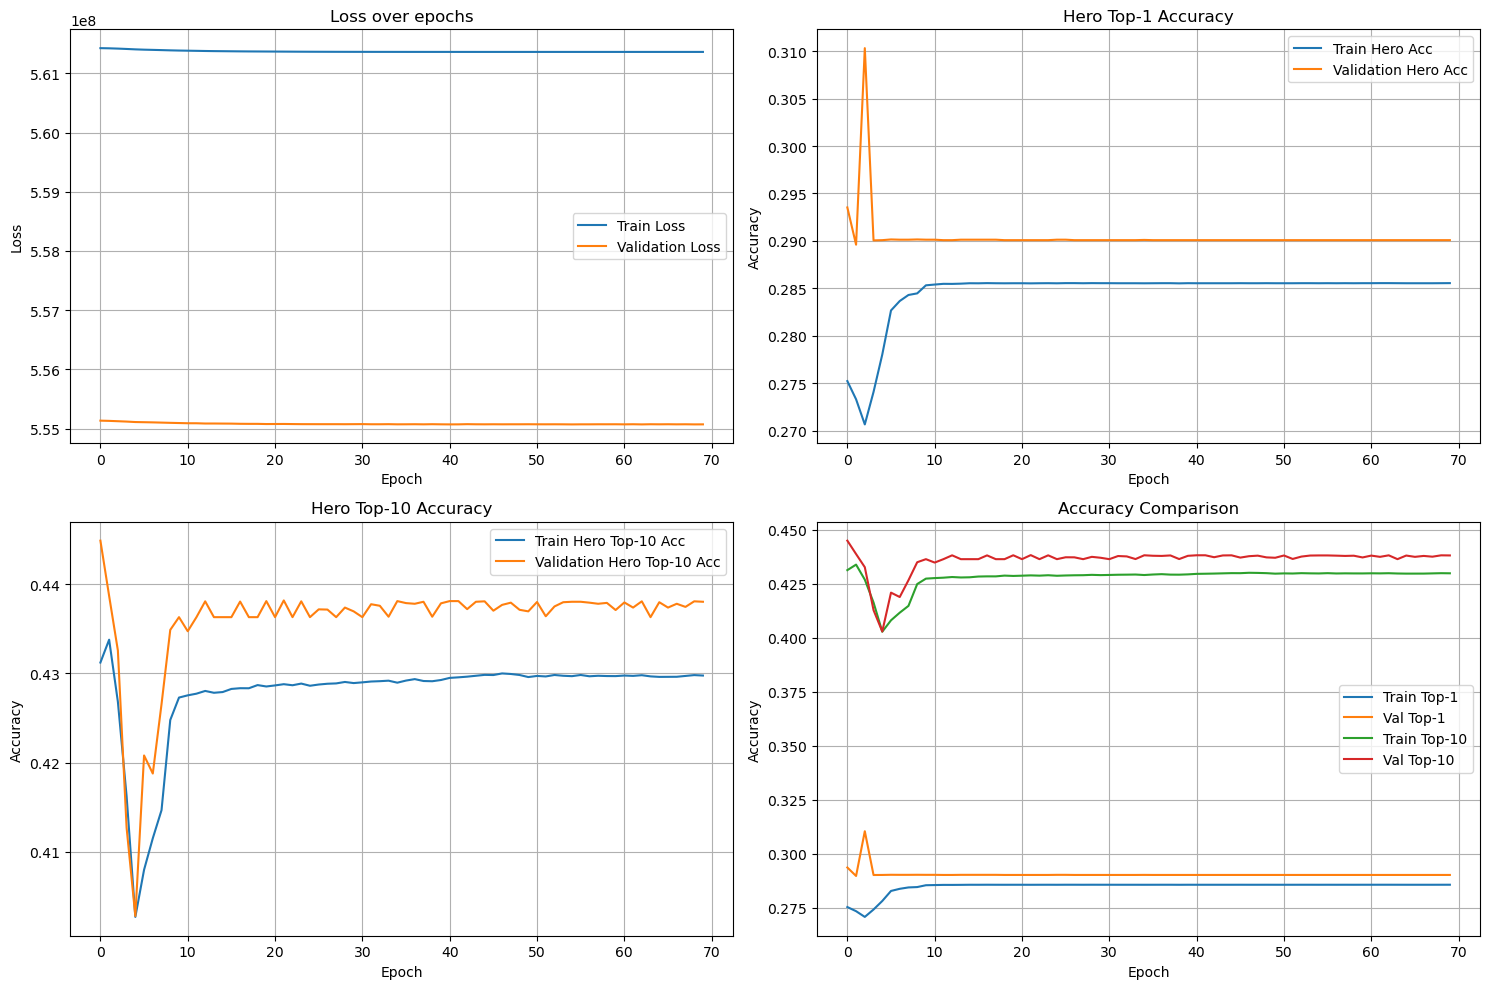

Final training accuracy: 0.2855
Final validation accuracy: 0.2901
Final top-10 training accuracy: 0.4298
Final top-10 validation accuracy: 0.4380


In [58]:
# Cell 8: Visualize training results
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# Plot loss
plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot hero accuracy (top-1)
plt.subplot(2, 2, 2)
plt.plot(train_accs, label='Train Hero Acc')
plt.plot(test_accs, label='Validation Hero Acc')
plt.title('Hero Top-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot hero accuracy (top-10)
plt.subplot(2, 2, 3)
plt.plot(train_top10_accs, label='Train Hero Top-10 Acc')
plt.plot(test_top10_accs, label='Validation Hero Top-10 Acc')
plt.title('Hero Top-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Combined accuracy comparison
plt.subplot(2, 2, 4)
plt.plot(train_accs, label='Train Top-1')
plt.plot(test_accs, label='Val Top-1')
plt.plot(train_top10_accs, label='Train Top-10')
plt.plot(test_top10_accs, label='Val Top-10')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('training_metrics.png')
plt.show()

# If you want to see statistics about the final performance
print(f"Final training accuracy: {train_accs[-1]:.4f}")
print(f"Final validation accuracy: {test_accs[-1]:.4f}")
print(f"Final top-10 training accuracy: {train_top10_accs[-1]:.4f}")
print(f"Final top-10 validation accuracy: {test_top10_accs[-1]:.4f}")


=== Scenario 1 ===
Current Draft:
Radiant: ['Anti-Mage', 'Crystal Maiden']
Dire: ['Axe', 'Bane']


NameError: name 'model' is not defined

In [ ]:
# Cell 11: Save the trained model
torch.save(model.state_dict(), 'dota2_draft_assistant_model.pth')
print("Model saved successfully!")

Top-1 Accuracy: 0.0290
Top-3 Accuracy: 0.0839
Top-5 Accuracy: 0.1285
Top-10 Accuracy: 0.2285
